<a href="https://colab.research.google.com/github/eebeohar/stock_predict/blob/main/1stSept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas_datareader.data import DataReader


In [ ]:
#!pip install --upgrade pandas-datareader

In [ ]:
data = DataReader('BEL.NS',data_source='yahoo',start='2010-01-01',end='2021-01-01')
data.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,59.818180,58.636364,59.090908,59.027271,2349666.0,47.897308
2010-01-05,59.657574,58.815151,59.393940,59.210606,1653828.0,48.046066
2010-01-06,59.299999,58.518181,59.122726,58.810604,417417.0,47.721481
2010-01-07,59.242424,58.280304,59.087879,58.475758,422004.0,47.449783
2010-01-08,58.743938,57.806061,57.806061,58.522728,851235.0,47.487896
2010-01-11,62.348484,58.106060,58.575756,61.468182,4406424.0,49.877964
2010-01-12,62.424240,59.515152,61.454544,59.753029,1479192.0,48.486233
2010-01-13,61.848484,59.278786,59.751514,61.004543,1876446.0,49.501743
2010-01-14,63.593941,60.969696,61.515152,62.731819,4986069.0,50.903339


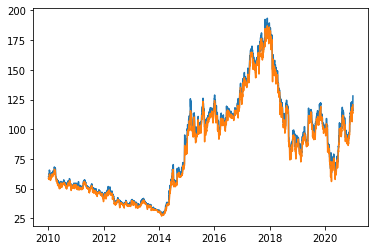

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data['High'])
plt.plot(data['Low'])
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler as MMS

In [ ]:
high_data = data['High'].values
high_data.shape

(2712,)

In [ ]:
high_data = high_data.reshape(high_data.shape[0],1)
high_data.shape

(2712, 1)

In [ ]:
obj1 = MMS(feature_range=(0,1))
high_data_norm = obj1.fit_transform(high_data) 

In [ ]:
import numpy as np


In [ ]:
train_len = np.ceil(len(high_data_norm)*0.8)
train_len

2170.0

In [ ]:
train_data = high_data_norm[0:int(train_len),:]

In [ ]:
test_len = np.ceil(len(high_data_norm)*0.1)
test_len

272.0

In [ ]:
val_data = high_data_norm[int(train_len):int(train_len) + int(test_len),:]
test_data = high_data_norm[int(train_len) + int(test_len):,:]


In [ ]:
test_data.shape

(270, 1)

In [ ]:
x_train = []
y_train = []
for i in range (10,len(train_data)):
  x_train.append(train_data[i-10:i,0]) # ????????
  y_train.append(train_data[i,0])
                       

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train.shape

(2160, 10)

In [ ]:
x_val = []
y_val = []
for i in range (10,len(val_data)):
  x_val.append(train_data[i-10:i,0]) # ????????
  y_val.append(train_data[i,0])
x_val = np.array(x_val)
y_val = np.array(y_val)                       

In [ ]:
x_test = []
y_test = []
for i in range (10,len(test_data)):
  x_test.append(test_data[i-10:i,0]) # ????????
  y_test.append(test_data[i,0])
x_test = np.array(x_test)
y_test = np.array(y_test)                       

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


In [ ]:
model = Sequential()
model.add(LSTM(64,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(128))
model.add(Dense(128))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 64)            16896     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 132,353
Trainable params: 132,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.0001)
model.compile(optimizer=adam,loss='mean_squared_error')

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_train.shape

(2160, 10, 1)

In [ ]:
x_val = x_val.reshape(x_val.shape[0],x_val.shape[1],1)
x_val.shape

(262, 10, 1)

In [ ]:
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
x_test.shape

(260, 10, 1)

In [ ]:
history = model.fit(x_train,y_train,batch_size=1,validation_data=(x_val,y_val),epochs=5)

Epoch 1/5
2160/2160 [==============================] - 22s 7ms/step - loss: 0.0033 - val_loss: 3.4924e-04
Epoch 2/5
2160/2160 [==============================] - 14s 6ms/step - loss: 7.6747e-04 - val_loss: 2.6768e-04
Epoch 3/5
2160/2160 [==============================] - 14s 6ms/step - loss: 6.6949e-04 - val_loss: 1.2510e-04
Epoch 4/5
2160/2160 [==============================] - 14s 6ms/step - loss: 6.3015e-04 - val_loss: 1.1214e-04
Epoch 5/5
2160/2160 [==============================] - 14s 6ms/step - loss: 5.3136e-04 - val_loss: 1.3158e-04


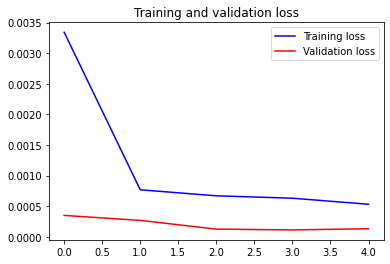

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
predicted = model.predict(x_test)

In [ ]:
rms = np.sqrt(np.mean((predicted-y_test)**2))


In [ ]:
rms

0.13506870638843016

In [ ]:
predicted = obj1.inverse_transform(predicted)
actual_y = obj1.inverse_transform(y_test.reshape(y_test.shape[0],1))


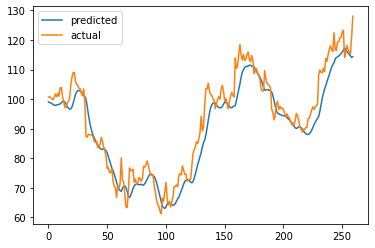

In [ ]:
plt.plot(predicted)
plt.plot(actual_y)
plt.legend(['predicted','actual'])
plt.show()